## Trump vs. Bolsonaro

Nesse notebook, busco explorar e comprar o conteudo dos tweets do ex-presidente dos EUA, Donald Trump, com o presidente brasilerio, Jair Bolsonaro. Ambos sao bastante associados pelas semelhancas politicas e ideologicas, alem do uso das redes sociais como principal fonte de engagamento para com seus eleitores. Mas sera que o seu discurso no Twitter tambem e similar?

Os dados foram coletados utilizando interfaces da API do Twitter disponiveis online. O intervalo escolhido foi do inicio de 2018 ate o final de 2019. Abaixo e possivel ver uma amostragem dos dados.

In [1]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [2]:
trump_tweets = pd.read_csv('tweets/trump.csv')

print(trump_tweets.shape)
trump_tweets.head(10)

(3591, 7)


,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,Will be interviewed at the Border by @seanhann...,01-11-2019 01:45:54,11518,67631,False,1083540470570143750
1,Twitter for iPhone,Dear Diary... https://t.co/NAuMaQW6fl,01-11-2019 01:10:49,45849,177910,False,1083531644785455104
2,Twitter for iPhone,From the Southern Border.... https://t.co/Vgsf...,01-10-2019 22:41:01,33539,129711,False,1083493944527249408
3,Twitter for iPhone,RT @SenateGOP: Why do we need border security?...,01-10-2019 18:17:01,25555,0,True,1083427505736839168
4,Twitter for iPhone,Because of the Democrats intransigence on Bord...,01-10-2019 18:14:31,21503,95295,False,1083426878336036865
5,Twitter for iPhone,President Obama thank you for your great suppo...,01-10-2019 16:47:11,55042,173490,False,1083404900862545920
6,Twitter for iPhone,MAKE AMERICA GREAT AGAIN!,01-10-2019 13:43:54,42673,198515,False,1083358775925460992
7,Twitter for iPhone,Getting ready to leave for the Great State of ...,01-10-2019 13:43:15,15164,101829,False,1083358611315789826
8,Twitter for iPhone,“Great support for Border Security and the Wal...,01-10-2019 13:41:25,18519,90118,False,1083358150214979585
9,Twitter for iPhone,There is GREAT unity with the Republicans in t...,01-10-2019 13:34:10,18829,87119,False,1083356326833602561


In [3]:
bolso_tweets = pd.read_csv('tweets/bolsonaro.csv')

print(bolso_tweets.shape)
bolso_tweets.head(10)

(3274, 11)


,screen_name,created_at,text,retweet_count,favorite_count,in_reply_to_screen_name,retweeted_status_screen_name,user_description,source,lang,id
0,jairbolsonaro,2019-11-01T00:30:19Z,"De volta ao Brasil, após viagem de negócios pe...",363,1975,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190063483779465219
1,jairbolsonaro,2019-10-31T21:31:36Z,"O @MInfraestrutura , junto com o @DNIToficial ...",314,1498,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190018506533814307
2,jairbolsonaro,2019-10-31T20:28:18Z,É uma enorme satisfação ver a alegria dessa mo...,93,563,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1190002578521767936
3,jairbolsonaro,2019-10-31T19:00:44Z,"A Baia de Angra dos Reis pode ser a nossa ""Can...",313,1637,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189980543380836356
4,jairbolsonaro,2019-10-31T17:10:23Z,"Bahia: concessão da Ferrovia Oeste-Leste, trec...",140,738,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189952770088013824
5,jairbolsonaro,2019-10-31T11:52:19Z,RT @SF_Moro: Prosseguem os recordes de apreens...,6478,0,NaN,SF_Moro,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189872726091141121
6,jairbolsonaro,2019-10-30T22:57:59Z,@Pauloeuaqui Kkkkkk,1,29,Pauloeuaqui,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,NaN,1189677859176095744
7,jairbolsonaro,2019-10-30T22:53:23Z,Risco-Brasil chega a seu menor patamar desde 2...,1074,4714,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189676703204937729
8,jairbolsonaro,2019-10-30T20:12:46Z,E CONHECEREIS A VERDADE E A VERDADE VOS LIBERT...,1255,4409,NaN,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189636282227531776
9,jairbolsonaro,2019-10-30T18:13:02Z,"Seguimos ampliando as possibilidades, bem como...",126,727,jairbolsonaro,NaN,"Capitão do Exército Brasileiro, eleito 38° Pre...",Twitter for iPhone,pt,1189606148267229184


Apos carregar os tweets, o proximo passo eh realizar um pre-processamento. Aqui, foi realizada lemmatizacao, remocao de stop-words e pontuacao. Alem disso, foi gerado uma lista auxiliar com todos os tweets do presidente brasileiro traduzidos para ingles. O que motiva isso eh a utilizacao de bibliotecas para analise de sentimento e discurso de odio que obtem melhores resultados com textos em ingles.

In [4]:
import string, re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from google_trans_new import google_translator

def clean(text, language):
    stop = set(stopwords.words(language))
    exclude = set(string.punctuation) 
    lemma = WordNetLemmatizer()
    doc = re.sub(r'http\S+', '', text)
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

bolso_tweets_cleaned = []
bolso_tweets_cleaned_pt = []
translator =  google_translator()

trump_tweets_cleaned = []
for tweet in trump_tweets['text'].values:
    trump_tweets_cleaned.append(clean(tweet,'english'))

for tweet_pt in bolso_tweets['text'].values:
    #tweet = translator.translate(tweet_pt, lang_tgt = 'en')
    #bolso_tweets_cleaned.append(clean(tweet,'english'))
    bolso_tweets_cleaned_pt.append(clean(tweet_pt,'portuguese'))


bolso_tweets_cleaned[:3], bolso_tweets_cleaned_pt[:3]

([],
 ['volta brasil após viagem negócios ásia oriente médio segue live quintafeira sobre assuntos semana link youtube',
  'minfraestrutura junto dnitoficial exercitooficial está semana seguem obras reparos pavimentação asfalto todo país velocidade acelerada exemplo br101rj br116rs br304rn br153to brs273 158pr br316pe br419ms',
  'enorme satisfação ver alegria dessa molecada ter certeza país jeito futuro'])

A traducao pode ser demorada, entao um arquivo pickle foi salvo para agilizar a execucao do notebook

In [5]:
import pickle
#pickle.dump(bolso_tweets_cleaned, open("bolso_en.p", "wb"))
bolso_tweets_cleaned = pickle.load(open('bolso_en.p', 'rb'))

O primeiro passo foi clusterizar os tweets. Foram gerados 4 clusters, atraves de representacoes baseadas em tf-idf (term frequency - inverse term frequency). O resultado pode ser visto abaixo

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer,TfidfTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

def print_clusters(cluster):
    i = 0
    label = ['purple', 'yellow', 'ciano', 'green']
    for c in cluster:
        print('Cluster no. '+str(i)+' - '+label[i] )
        print(', '.join(c))
        i = i + 1
        
def kmeans(documents):

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(documents)
    true_k = 4
    model = KMeans(n_clusters=true_k, init='k-means++', max_iter=5000, n_init=50 )
    model.fit(X)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    topics = []
    for i in range(true_k):
        t = []
        for ind in order_centroids[i, :10]:
            t.append(terms[ind])
        topics.append(t)
        
    pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ])          

    X = pipeline.fit_transform(documents).todense()        
    pca = PCA(n_components=50).fit(X)
    data2D = pca.transform(X)
    plt.figure(figsize=(20,14))
    plt.scatter(data2D[:,0], data2D[:,1],c=model.labels_, cmap='viridis')
    plt.show()
    print_clusters(topics)


Trump tweets - clustered


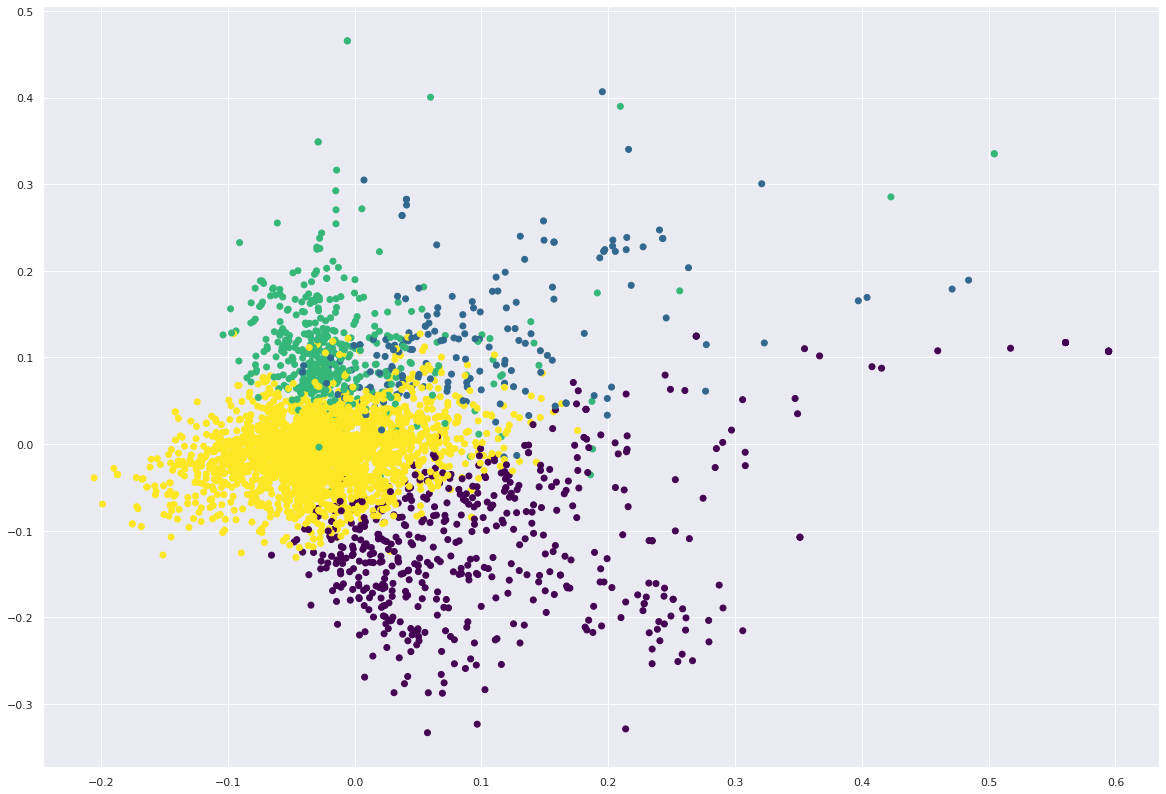

Cluster no. 0 - purple
border, great, vote, america, crime, wall, security, democrat, military, strong
Cluster no. 1 - yellow
thank, you, love, great, maga, honor, west, first, responder, america
Cluster no. 2 - ciano
rt, realdonaldtrump, whitehouse, president, trump, scavino45, potus, erictrump, flotus, great
Cluster no. 3 - green
great, people, amp, president, country, news, trump, year, fake, many


In [7]:
print('Trump tweets - clustered')
kmeans(trump_tweets_cleaned)

Analisando os clusters gerados, eh possivel ver que ha grande interpolacao entre todos eles. Um topico que se destacam eh a politica contra imigracao (Cluster amarelo), parte chave do governo Trump.


Bolsonaro tweets - clustered


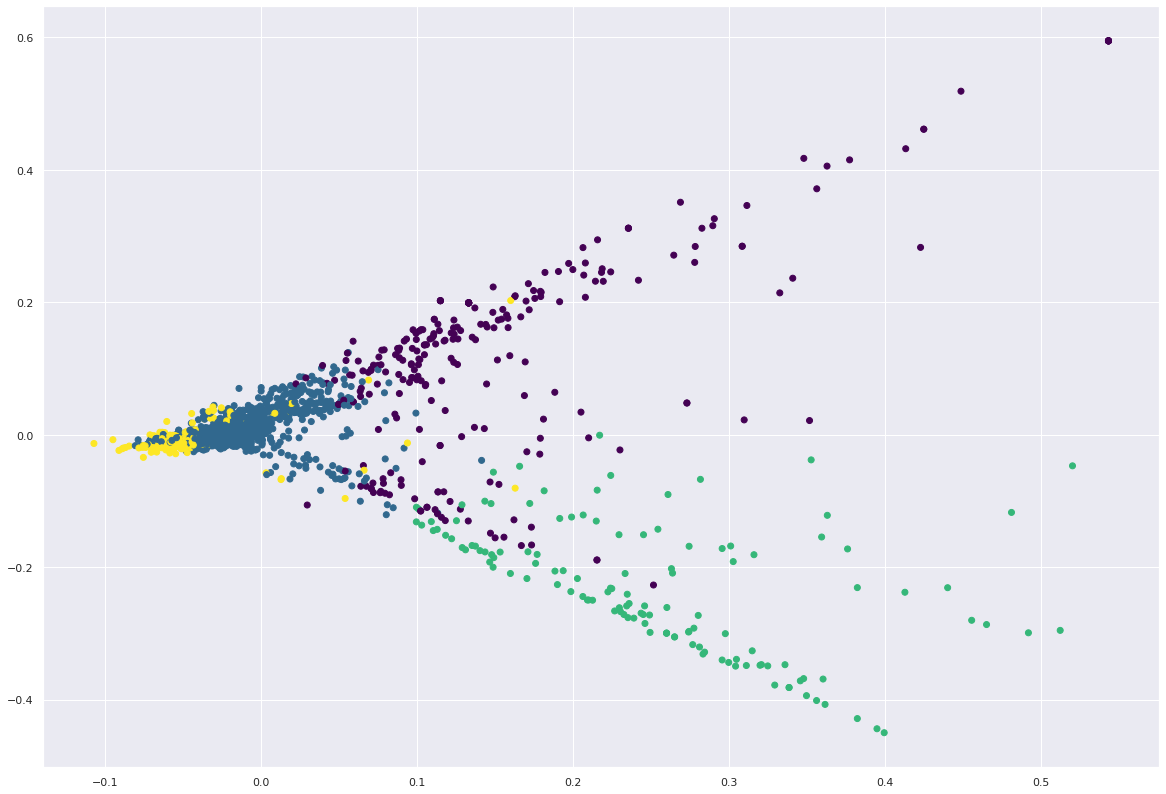

Cluster no. 0 - purple
todos, boa, obrigado, bom, dia, noite, brasil, acima, consideração, grande
Cluster no. 1 - yellow
brasil, rt, governo, ano, hoje, sobre, país, vamos, economia, ministro
Cluster no. 2 - ciano
abraço, forte, obrigado, todos, consideração, hoje, brasil, deus, bom, trabalho
Cluster no. 3 - green
bolsonaro, jair, rt, presidente, governo, live, visita, youtube, sobre, semana


In [8]:
print('\nBolsonaro tweets - clustered')
kmeans(bolso_tweets_cleaned_pt)

Os clusters gerados atraves dos tweets do presidente brasileiro sao um pouco mais ambiguos, mas eh possivel destacar as palavras 'deus', parte do lema do presidente, e a palavra 'live', provavelmente fazendo referencias as lives realizadas pelo presidente no Facebook para engajar seus eleitores.

### Analise de sentimentos e polaridade do discurso

A proxima analise consiste em identificar a prevalencia de polaridade no discurso presente nos tweets. Para isso, foi utilizada a biblioteca TextBlob, que atribui um valor de -1 a 1 para a polaridade do discurso. Alem dela, foi utilizada a biblioteca EraseHate, que atribui um score para o texto em relacao a 3 classes: Discurso de odio, discurso ofensivo e discurso neutro. Com esses valores, foram plotados histogramas, que podem ser vistos abaixo

In [9]:
import erasehate as eh
from textblob import TextBlob

def sentiment_analysis(docs, translate):
    erase_pred = []
    polarity = []

        
    for documents in docs:
        analysis_tb = TextBlob(documents)
        polarity.append(analysis_tb.sentiment.polarity)
    #erase_pred.append(eh.classifier(docs).predict().raw_output)    
    return erase_pred, polarity


bolso_eh, bolso_polarity = sentiment_analysis(bolso_tweets_cleaned,1)
#pickle.dump(bolso_eh, open("bolso_eh.p", "wb"))
bolso_eh = pickle.load(open("bolso_eh.p", "rb"))

trump_eh, trump_polarity = sentiment_analysis(trump_tweets_cleaned,0)
#pickle.dump(trump_eh, open("trump_eh.p", "wb"))
trump_eh = pickle.load(open("trump_eh.p", "rb"))

In [10]:
def plot_polarity(polarity, who):
    plt.figure(figsize=(16,6))
    fig = sns.distplot(polarity)
    fig.set_title('Polarity of tweets '+who)
    fig.set_ylabel('no. of tweets')
    fig.set_xlabel('polarity')

In [11]:
def plot_erasehate(erase_pred, who):
    hate = []
    offe = []
    neit = []

    prediction_array = erase_pred[0]['prediction_array']

    for i in prediction_array:
        hate.append(i[0])
        offe.append(i[1])
        neit.append(i[2])

    fig, (ax1, ax2, ax3)  = plt.subplots(1,3, figsize=(16,6))
    sns.distplot(hate, ax=ax1)
    ax1.set_title('distribution of hate speech '+who)
    ax1.set_ylabel('no. of tweets')
    ax1.set_xlabel('prob. of hate speech')
    sns.distplot(offe, ax=ax2)
    ax2.set_title('distribution of offensive speech '+who)
    ax2.set_ylabel('no. of tweets')
    ax2.set_xlabel('prob. of offensive speech')
    sns.distplot(neit, ax=ax3)
    ax3.set_ylabel('no. of tweets')
    ax3.set_title('distribution of neutral speech '+who)
    ax3.set_xlabel('prob. of neutral speech')

/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


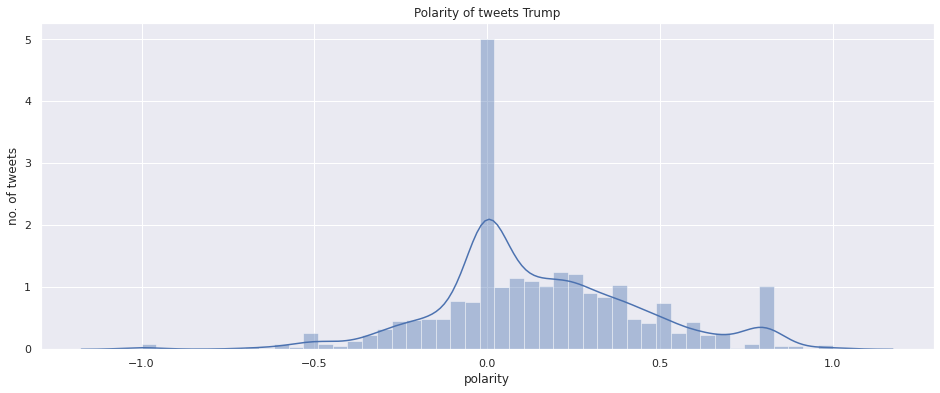

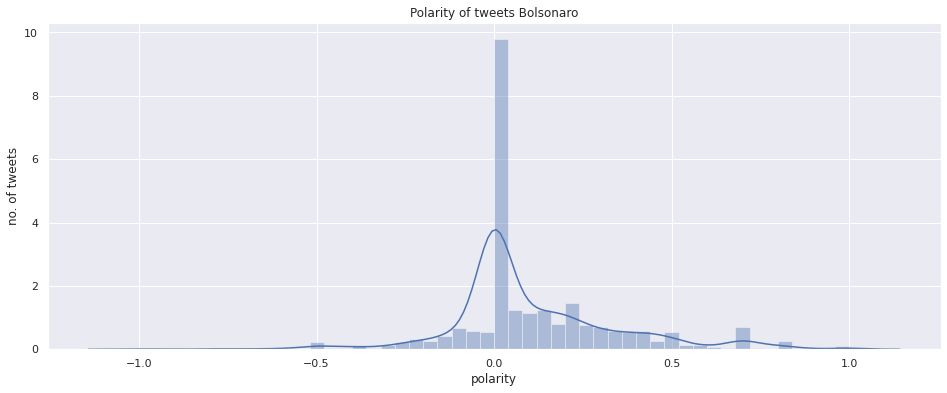

In [12]:
plot_polarity(trump_polarity, 'Trump')
plot_polarity(bolso_polarity, 'Bolsonaro')

Analisando a polaridade, eh possivel ver a predominacia de polaridade neutra em outros casos. Porem, os tweets de Trump tendem a ter um score mais positivo.

/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ggapp/anaconda3/envs/nlp-final/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-l

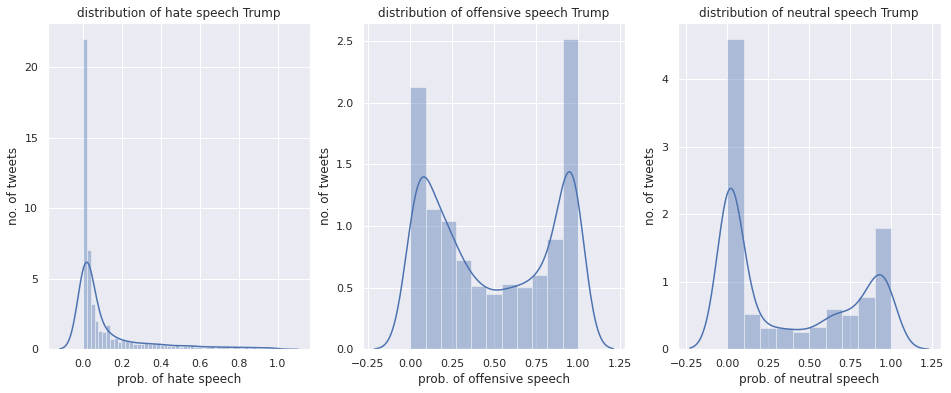

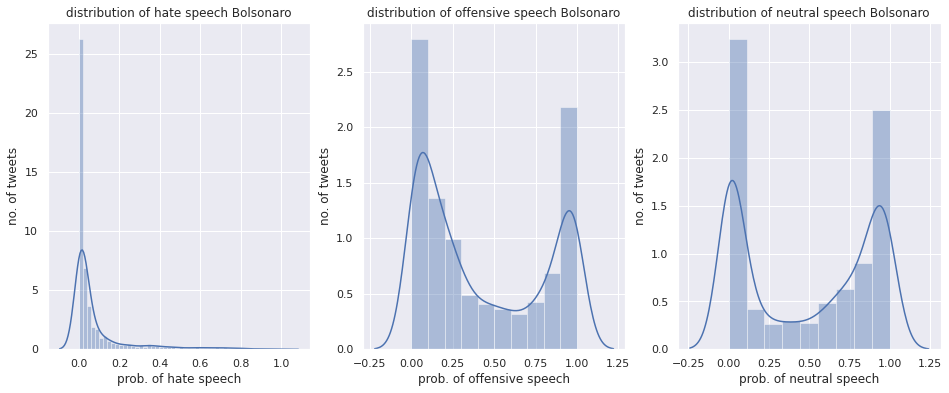

In [13]:
plot_erasehate(trump_eh, 'Trump')
plot_erasehate(bolso_eh, 'Bolsonaro')

Como eh possivel observar, a distribuicao entre as 3 classes obtidas atraves do EraseHate sao bastante similares entre os dois presidentes. Em ambos, eh possivel ver baixa predominancia de discurso de odio e uma razoavel predominancia de discurso ofensivo.

## Analise de topicos via LDA
A proxima analise consiste em utilizar um modelo de latent dirichlet allocation (LDA) para obter os principais topicos presentes nos tweets. Foi utilizado a biblioteca gensim, que implementa todo o ferramental necessario, e a biblioteca pyLDAVis para a visualizacao dos resultados.

In [14]:
import spacy
from gensim import corpora
spacy.load('en_core_web_sm')
from spacy.lang.en import English
import gensim
import pyLDAvis.gensim

parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = []
    for t in text:
        t = tokenize(t)
        t = [token for token in t if len(token) > 3]
        tokens.append(t)
    return tokens


def get_topics_lda(tweets):
    text_lda = prepare_text_for_lda(tweets)

    dictionary = corpora.Dictionary(text_lda)
    corpus = [dictionary.doc2bow(text) for text in text_lda]
    
    NUM_TOPICS = 5
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    for topic in topics:
        print(topic)
    lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
    return lda_display

In [15]:
lda_display = get_topics_lda(trump_tweets_cleaned)
pyLDAvis.display(lda_display)

(0, '0.018*"great" + 0.014*"president" + 0.013*"today" + 0.013*"thank"')
(1, '0.025*"great" + 0.014*"vote" + 0.012*"america" + 0.010*"twitter"')
(2, '0.017*"news" + 0.016*"fake" + 0.014*"country" + 0.010*"many"')
(3, '0.020*"border" + 0.016*"great" + 0.011*"want" + 0.010*"democrat"')
(4, '0.008*"north" + 0.008*"korea" + 0.008*"collusion" + 0.007*"china"')


### Topicos Trump
Os topicos obtidos sao similares aos obtidos via clusterizacao, mas sao mais informativos. No topico 4, a palavra Collusion indica relacao com o caso Mueller e a associacao de Trump com a Russia [https://www.bbc.com/news/world-us-canada-42493918].

In [16]:
lda_display = get_topics_lda(bolso_tweets_cleaned)
pyLDAvis.display(lda_display)

(0, '0.031*"brazil" + 0.011*"brazilian" + 0.009*"thank" + 0.007*"country"')
(1, '0.018*"good" + 0.011*"brazil" + 0.010*"everyone" + 0.009*"strong"')
(2, '0.011*"brazil" + 0.011*"bolsonaro" + 0.010*"government" + 0.007*"country"')
(3, '0.012*"government" + 0.010*"year" + 0.008*"brazil" + 0.007*"minister"')
(4, '0.025*"bolsonaro" + 0.016*"jair" + 0.014*"live" + 0.009*"watch"')


### Topicos Bolsonaro
Os topicos obtidos sao menos informativos que os de Trump, mas oferecem observacoes interessantes. Eh possivel ver a presenca de hashtags como 'odiodobem' e 'nasruascombolsonaro' no topico 3, usadas para engajar seus seguidores.

### Conclusao 
Com as analises, foi possivel observar certa semelhanca entre o modus operandi de ambos os presidentes no Twitter. O Presidente brasileiro, porem, aborda mais topicos genericos e governamentais que a contraparte americana, talvez por tambem ter como grande canal com seus eleitores as lives no Facebook e os grupos de WhatsApp.

### Referencias

Erase hate: https://pypi.org/project/erasehate/
TextBlob: https://textblob.readthedocs.io/en/dev/
Ituassu, A., Lifschitz, S., Capone, L., & Mannheimer, V. (2019). De Donald Trump a Jair Bolsonaro: democracia e comunicação política digital nas eleições de 2016, nos Estados Unidos, e 2018, no Brasil. In 8º Congresso COMPOLÍTICA, Brasília–DF (Vol. 15).
